In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import xarray as xr
from mpl_toolkits.axes_grid1 import ImageGrid
import warnings

# Disable all warnings
warnings.filterwarnings("ignore")

In [18]:
from wrf import (getvar, to_np, get_cartopy, latlon_coords, vertcross, ll_to_xy,
                 cartopy_xlim, cartopy_ylim, interpline, CoordPair, destagger, 
                 interplevel)


In [10]:
dir = '/bsuhome/stanleyakor/WRF-Analysis/schemes/'
dir_thomp = dir + 'thompson-8'
dir_wsm5 = dir + 'wsm5-4'
dir_wsm6 = dir + 'wsm6-6'
dir_milb8 = dir + 'milbrandt-9'

In [11]:
%%bash
pwd

/bsuhome/stanleyakor/Python-tutorial/wrf-python


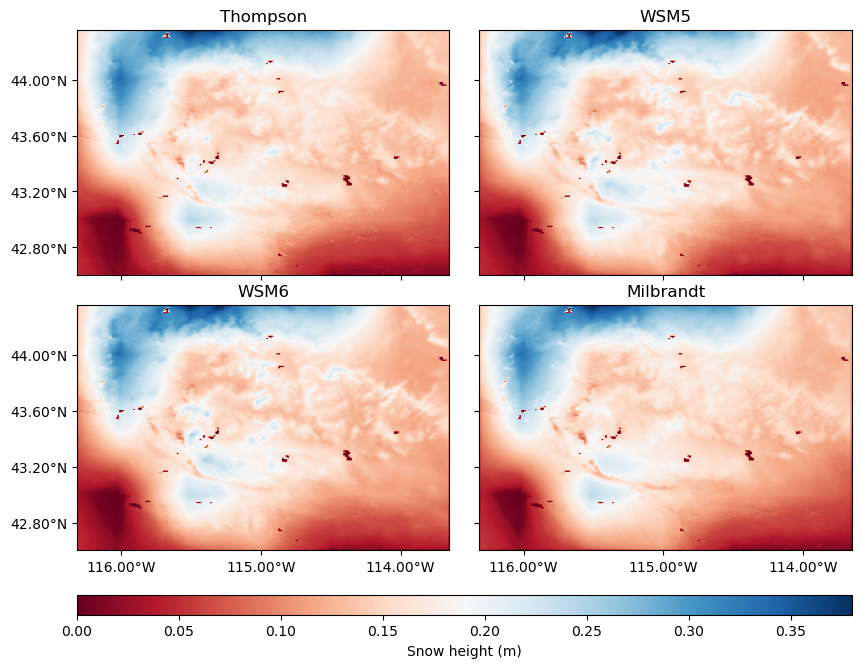

In [12]:

# Open the wrfout file
file_th= dir_thomp + "/thompson_sliced.nc"
file_w5= dir_wsm5 + "/wsm5_sliced.nc"
file_w6= dir_wsm6+ "/wsm6_sliced.nc"
file_mil8= dir_milb8 + "/milbrandt_sliced.nc"



wrf_data_th = xr.open_dataset(file_th)
wrf_data_w5 = xr.open_dataset(file_w5)
wrf_data_w6 = xr.open_dataset(file_w6)
wrf_data_mil8 = xr.open_dataset(file_mil8)

variable = "SNOWH"
#tit = "Hourly mean snow height for the thompson scheme"

# Compute hourly mean snow height
snowh_th = wrf_data_th[variable].mean(dim="Time")
snowh_wsm5 = wrf_data_w5[variable].mean(dim="Time")
snowh_wsm6 = wrf_data_w6[variable].mean(dim="Time")
snowh_mil8 = wrf_data_mil8[variable].mean(dim="Time")

# Extract latitude and longitude dimensions
lat = wrf_data_th['XLAT'].isel(Time=0)
lon = wrf_data_th['XLONG'].isel(Time=0)


file_list = [snowh_th,snowh_wsm5,snowh_wsm6,snowh_mil8]
title = ['Thompson', 'WSM5', 'WSM6', 'Milbrandt']

# Set up figure and image grid
fig = plt.figure(figsize=(10, 15))

grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(2,2),
                 axes_pad=0.3,
                 share_all=True,
                 cbar_location="bottom",
                 cbar_mode="single",
                 cbar_size="4%",
                 cbar_pad=0.15,
                )
i = 0
for ax in grid:
    im = ax.imshow(file_list[i],extent=(lon.min(), lon.max(), lat.min(), lat.max()), cmap='RdBu', origin='lower', alpha=1.0)
    ax.set_title(title[i])
    ax.xaxis.set_major_locator(plt.MultipleLocator(base=1.0))
    ax.yaxis.set_major_locator(plt.MultipleLocator(base=0.4))
    i +=1

# for ax in ax.flat:
lon_ticks = ax.get_xticks()
lat_ticks = ax.get_yticks()
lon_labels = [f'{abs(lon):.2f}°{"W" if lon < 0 else "E"}' for lon in lon_ticks]
lat_labels = [f'{abs(lat):.2f}°{"S" if lat < 0 else "N"}' for lat in lat_ticks]
ax.set_xticklabels(lon_labels)
ax.set_yticklabels(lat_labels)
    
# Colorbar
cbar = ax.cax.colorbar(im)
cbar_X = ax.cax.toggle_label(True)
cbar.set_label("Snow height (m)")

plt.savefig('mean_snowh.pdf', dpi=600)
plt.show()

In [13]:
%%bash
pwd
ls

/bsuhome/stanleyakor/Python-tutorial/wrf-python
elevation_plot.pdf
elevation_plot.png
location_analysis.ipynb
log_slurm_split.o494075
mean_snowh_diff.pdf
mean_snowh_diff.png
mean_snowh.pdf
mean_snowh.png
plot_terrain_wrfpython.ipynb
__pycache__
scheme2.ipynb
scheme.ipynb
split.py
submit_split.bash
WRF_domain_pywrf.big.png


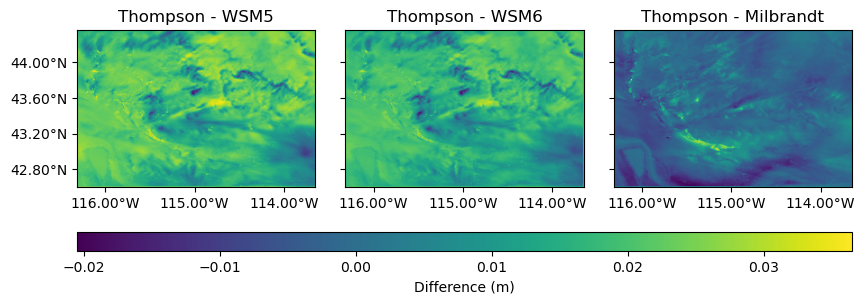

In [14]:

# Open the wrfout file
file_th= dir_thomp + "/thompson_sliced.nc"
file_w5= dir_wsm5 + "/wsm5_sliced.nc"
file_w6= dir_wsm6+ "/wsm6_sliced.nc"
file_mil8= dir_milb8 + "/milbrandt_sliced.nc"



wrf_data_th = xr.open_dataset(file_th)
wrf_data_w5 = xr.open_dataset(file_w5)
wrf_data_w6 = xr.open_dataset(file_w6)
wrf_data_mil8 = xr.open_dataset(file_mil8)

variable = "SNOWH"
#tit = "Hourly mean snow height for the thompson scheme"

# Compute hourly mean snow height
snowh_th = wrf_data_th[variable].mean(dim="Time")
snowh_wsm5 = wrf_data_w5[variable].mean(dim="Time")
snowh_wsm6 = wrf_data_w6[variable].mean(dim="Time")
snowh_mil8 = wrf_data_mil8[variable].mean(dim="Time")

# Extract latitude and longitude dimensions
lat = wrf_data_th['XLAT'].isel(Time=0)
lon = wrf_data_th['XLONG'].isel(Time=0)


file_list = [snowh_th -snowh_wsm5,snowh_th-snowh_wsm6,snowh_th-snowh_mil8]
title = ['Thompson - WSM5', 'Thompson - WSM6', 'Thompson - Milbrandt']

# Set up figure and image grid
fig = plt.figure(figsize=(10, 15))

grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,3),
                 axes_pad=0.3,
                 share_all=True,
                 cbar_location="bottom",
                 cbar_mode="single",
                 cbar_size="4%",
                 cbar_pad=0.15,
                )
i = 0
for ax in grid:
    im = ax.imshow(file_list[i],extent=(lon.min(), lon.max(), lat.min(), lat.max()), origin='lower', alpha=1.0)
    ax.set_title(title[i])
    ax.xaxis.set_major_locator(plt.MultipleLocator(base=1.0))
    ax.yaxis.set_major_locator(plt.MultipleLocator(base=0.4))
    i +=1

# for ax in ax.flat:
lon_ticks = ax.get_xticks()
lat_ticks = ax.get_yticks()
lon_labels = [f'{abs(lon):.2f}°{"W" if lon < 0 else "E"}' for lon in lon_ticks]
lat_labels = [f'{abs(lat):.2f}°{"S" if lat < 0 else "N"}' for lat in lat_ticks]
ax.set_xticklabels(lon_labels)
ax.set_yticklabels(lat_labels)
    
# Colorbar
cbar = ax.cax.colorbar(im)
cbar_X = ax.cax.toggle_label(True)
cbar.set_label("Difference (m)")

plt.savefig('mean_snowh_diff.pdf', dpi=600)
plt.show()